<a href="https://colab.research.google.com/github/Akshita0501/CODSOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/My Drive/movie_genre.zip'

# Destination directory for extraction
extraction_dir = '/content/'

# Extract the dataset from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the files in the extraction directory to verify the file names
extracted_files = os.listdir(extraction_dir)
print("Extracted files:", extracted_files)

Extracted files: ['.config', 'drive', 'Genre Classification Dataset', 'sample_data']


In [ ]:
# Assuming the dataset is inside the 'Genre Classification Dataset' folder
dataset_folder = os.path.join(extraction_dir, 'Genre Classification Dataset')

# Load the dataset
dataset_path = os.path.join(dataset_folder, 'train_data.txt')
data = pd.read_csv(dataset_path, sep='\t', names=['movie_id', 'genre', 'plot_summary'])

# Check for missing values in the 'plot_summary' column
data = data.dropna(subset=['plot_summary'])

# Check if the dataset is not empty after dropping missing values
if not data.empty:
    # Split the dataset into training and testing sets
    X = data['plot_summary']
    y = data['genre']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize the plot summaries using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype('str'))
    X_test_tfidf = tfidf_vectorizer.transform(X_test.astype('str'))

else:
    print("Dataset is empty after handling missing values.")

Dataset is empty after handling missing values.


In [ ]:
print("Number of missing values before dropping:", data['plot_summary'].isnull().sum())

Number of missing values before dropping: 0


In [ ]:
print(data.head())

Empty DataFrame
Columns: [movie_id, genre, plot_summary]
Index: []


In [ ]:
data['plot_summary'] = data['plot_summary'].fillna('Unknown')

In [ ]:

dataset_folder = os.path.join(extraction_dir, 'Genre Classification Dataset')

dataset_path = os.path.join(dataset_folder, 'train_data.txt')
data = pd.read_csv(dataset_path, sep='\t', names=['movie_id', 'genre', 'plot_summary'])

# Check the number of missing values before any operations
print("Number of missing values before any operations:", data['plot_summary'].isnull().sum())

# Examine the content of the dataset before any operations
print("Dataset content before any operations:")
print(data.head())

Number of missing values before any operations: 54214
Dataset content before any operations:
                                            movie_id  genre  plot_summary
0  1 ::: Oscar et la dame rose (2009) ::: drama :...    NaN           NaN
1  2 ::: Cupid (1997) ::: thriller ::: A brother ...    NaN           NaN
2  3 ::: Young, Wild and Wonderful (1980) ::: adu...    NaN           NaN
3  4 ::: The Secret Sin (1915) ::: drama ::: To h...    NaN           NaN
4  5 ::: The Unrecovered (2007) ::: drama ::: The...    NaN           NaN


In [ ]:
dataset_folder = os.path.join(extraction_dir, 'Genre Classification Dataset')

dataset_path = os.path.join(dataset_folder, 'train_data.txt')

# Read the data with a custom separator and column names
data = pd.read_csv(dataset_path, sep=':::', header=None, names=['movie_id', 'title', 'genre', 'plot_summary'], engine='python')

print("Number of missing values before any operations:", data['plot_summary'].isnull().sum())

print("Dataset content before any operations:")
print(data.head())

Number of missing values before any operations: 0
Dataset content before any operations:
   movie_id                               title       genre  \
0         1       Oscar et la dame rose (2009)       drama    
1         2                       Cupid (1997)    thriller    
2         3   Young, Wild and Wonderful (1980)       adult    
3         4              The Secret Sin (1915)       drama    
4         5             The Unrecovered (2007)       drama    

                                        plot_summary  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [ ]:
# Split the dataset into training and testing sets
X = data['plot_summary']
y = data['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the plot summaries using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.astype('str'))
X_test_tfidf = tfidf_vectorizer.transform(X_test.astype('str'))

Model Building and Evaluation:

In [ ]:
#Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the Naive Bayes model
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.5231946878170248
Naive Bayes Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.36      0.48       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the Logistic Regression model
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.5795444065295582
Logistic Regression Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.52      0.26      0.35       263
       adult        0.71      0.21      0.33       112
   adventure        0.41      0.14      0.21       139
   animation        0.65      0.11      0.18       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.43      0.03      0.05       107
 documentary        0.66      0.85      0.74      2659
       drama        0.55      0.78      0.64      2697
      family        0.41      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.63      0.56      0.59       431
       music        0.64      0.47      0.54       144
     musical        1.00      0.02      0.04        50
     mystery        0.00      0.00      0.00        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the SVM model
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.5853546066586738
SVM Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.49      0.36      0.41       263
       adult        0.67      0.39      0.49       112
   adventure        0.44      0.22      0.29       139
   animation        0.54      0.14      0.23       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.60      0.56      1443
       crime        0.17      0.02      0.03       107
 documentary        0.68      0.83      0.74      2659
       drama        0.55      0.75      0.64      2697
      family        0.28      0.07      0.12       150
     fantasy        0.17      0.01      0.03        74
   game-show        0.92      0.55      0.69        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.61      0.62       431
       music        0.63      0.53      0.58       144
     musical        0.60      0.06      0.11        50
     mystery        0.50      0.04      0.07        56
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


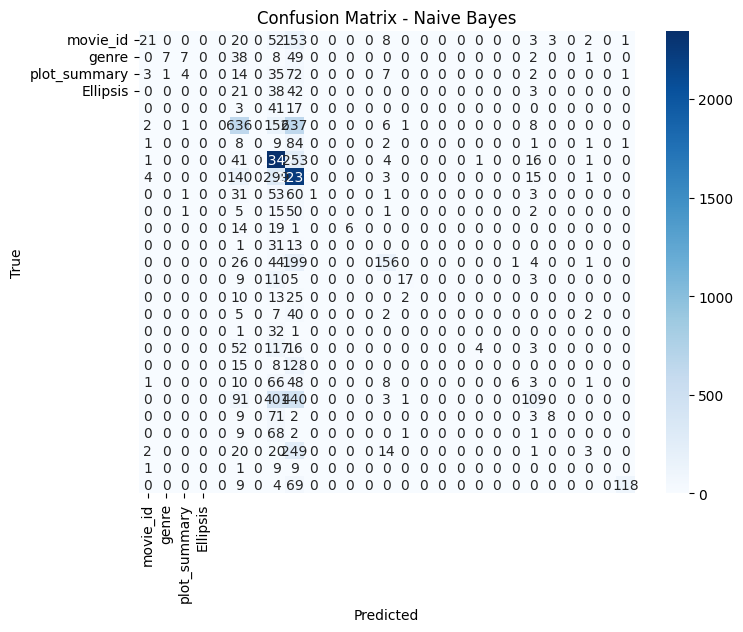

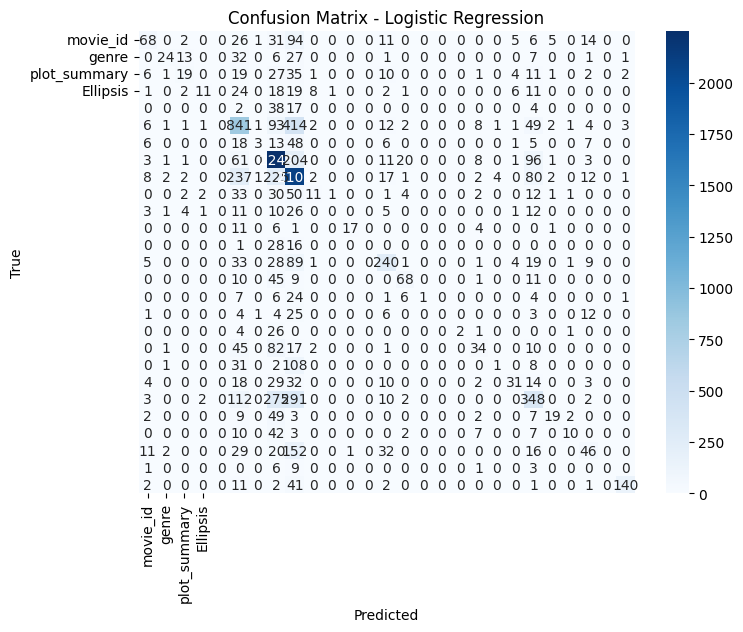

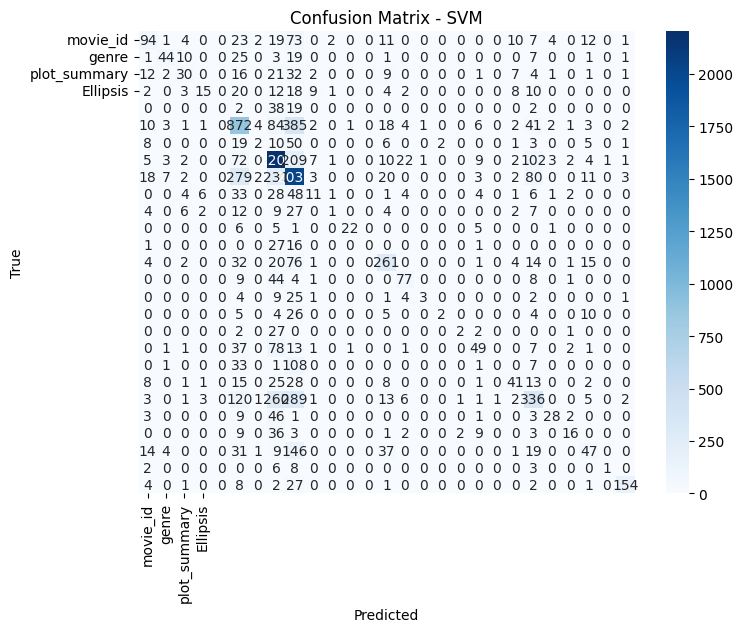

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Class labels for your dataset
classes = ['movie_id', 'genre', 'plot_summary', ...]

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, nb_predictions, classes, 'Naive Bayes')

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_predictions, classes, 'Logistic Regression')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_predictions, classes, 'SVM')


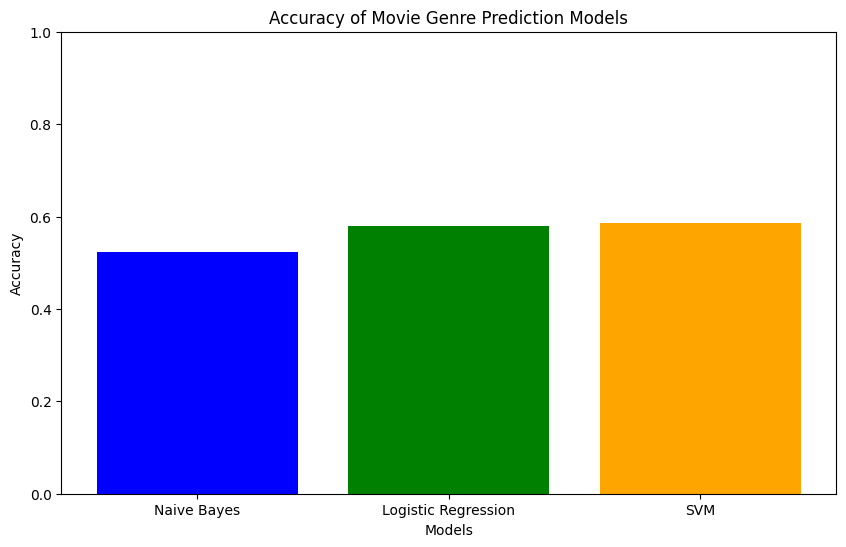

In [ ]:
# Accuracy scores for different models
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracy_scores = [nb_accuracy, lr_accuracy, svm_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Movie Genre Prediction Models')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1 for accuracy scores
plt.show()

In [ ]:
def predict_genre(movie_name):
    # Assuming 'tfidf_vectorizer', 'lr_classifier', and 'data' are available from the previous code

    # Vectorize the input plot summary
    input_tfidf = tfidf_vectorizer.transform([movie_name])

    # Make predictions using the Logistic Regression classifier
    prediction = lr_classifier.predict(input_tfidf)

    return prediction[0]  # Assuming lr_classifier is trained for a single-label classification task

# Example usage:
movie_name_input = "The Unrecovered (2007)"
predicted_genre = predict_genre(movie_name_input)

print(f"The predicted genre for the movie '{movie_name_input}' is: {predicted_genre}")

The predicted genre for the movie 'The Unrecovered (2007)' is:  documentary 


In [ ]:
def predict_genre(movie_name):
    # Assuming 'tfidf_vectorizer', 'lr_classifier', and 'data' are available from the previous code

    # Vectorize the input plot summary
    input_tfidf = tfidf_vectorizer.transform([movie_name])

    # Make predictions using the Logistic Regression classifier
    prediction = lr_classifier.predict(input_tfidf)

    return prediction[0]  # Assuming lr_classifier is trained for a single-label classification task

# Example usage:
movie_name_input = "The Secret Sin (1915)"
predicted_genre = predict_genre(movie_name_input)

print(f"The predicted genre for the movie '{movie_name_input}' is: {predicted_genre}")

The predicted genre for the movie 'The Secret Sin (1915)' is:  drama 
